## **SETUP**

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [2]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OuputMaxV_CSV'

Transient_Output = []

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SPVS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TPV.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)


# **LSTM**

In [3]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_LSTM = np.concatenate(SteadyState_Input)
Transient_Output_LSTM = np.concatenate(Transient_Output)
SteadyState_Input_LSTM_Reshape = SteadyState_Input_LSTM.reshape((SteadyState_Input_LSTM.shape[0], 1, SteadyState_Input_LSTM.shape[1]))
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_LSTM_Reshape, Transient_Output_LSTM, test_size=0.2, random_state=42)

In [20]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
model = Sequential()
model.add(LSTM(32, input_shape=(Steady_train.shape[1], Steady_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(Transient_train.shape[1], activation='linear', return_sequences=False))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [4]:
model = Sequential()
input_features = Steady_train.shape[2]

# Define the LSTM model
model.add(LSTM(input_features, input_shape=(Steady_train.shape[1], input_features), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(Transient_train.shape[1], activation='linear', return_sequences=False))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [5]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
#https://keras.io/api/models/model_training_apis/#evaluate-method
#https://keras.io/api/models/model_training_apis/#fit-method
model.fit(Steady_train, Transient_train, epochs=5, batch_size=16, validation_split=0.4)
loss, mse = model.evaluate(Steady_test, Transient_test)
print(f"Model performance:\nLoss: {loss}\nMSE: {mse}")

Epoch 1/5
5334/5334 [==============================] - 42s 7ms/step - loss: 0.1050 - mse: 0.1050 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 2/5
5334/5334 [==============================] - 32s 6ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 3/5
5334/5334 [==============================] - 36s 7ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 4/5
5334/5334 [==============================] - 38s 7ms/step - loss: 0.0741 - mse: 0.0741 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 5/5
1112/1112 [==============================] - 2s 2ms/step - loss: 0.0748 - mse: 0.0748
Model performance:
Loss: 0.07478805631399155
MSE: 0.07478805631399155


# **PREDICTION**

In [14]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0\N0SPVS.csv')
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41\N41SPVS.csv')
SteadyState_New2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42\N42SPVS.csv')
SteadyState_New3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43\N43SPVS.csv')
SteadyState_New4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44\N44SPVS.csv')
SteadyState_New5 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N45\N45SPVS.csv')
SteadyState_New6 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N46\N46SPVS.csv')
SteadyState_New7 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N47\N47SPVS.csv')
SteadyState_New8 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N48\N48SPVS.csv')
SteadyState_New9 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N49\N49SPVS.csv')
SteadyState_New0 = SteadyState_New0.replace(' null', 0)
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyState_New2 = SteadyState_New2.replace(' null', 0)
SteadyState_New3 = SteadyState_New3.replace(' null', 0)
SteadyState_New4 = SteadyState_New4.replace(' null', 0)
SteadyState_New5 = SteadyState_New5.replace(' null', 0)
SteadyState_New6 = SteadyState_New6.replace(' null', 0)
SteadyState_New7 = SteadyState_New7.replace(' null', 0)
SteadyState_New8 = SteadyState_New8.replace(' null', 0)
SteadyState_New9 = SteadyState_New9.replace(' null', 0)
SteadyStateVelocity_0 = SteadyState_New0.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_2 = SteadyState_New2.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_3 = SteadyState_New3.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_4 = SteadyState_New4.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_5 = SteadyState_New5.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_6 = SteadyState_New6.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_7 = SteadyState_New7.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_8 = SteadyState_New8.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_9 = SteadyState_New9.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_0 = scaler_input.transform(SteadyStateVelocity_0 )
SteadyStateVelocity_1 = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_2 = scaler_input.transform(SteadyStateVelocity_2 )
SteadyStateVelocity_3 = scaler_input.transform(SteadyStateVelocity_3 )
SteadyStateVelocity_4 = scaler_input.transform(SteadyStateVelocity_4 )
SteadyStateVelocity_5 = scaler_input.transform(SteadyStateVelocity_5 )
SteadyStateVelocity_6 = scaler_input.transform(SteadyStateVelocity_6 )
SteadyStateVelocity_7 = scaler_input.transform(SteadyStateVelocity_7 )
SteadyStateVelocity_8 = scaler_input.transform(SteadyStateVelocity_8 )
SteadyStateVelocity_9 = scaler_input.transform(SteadyStateVelocity_9 )
SteadyStateVelocity_0 = SteadyStateVelocity_0.reshape((SteadyStateVelocity_0.shape[0], 1, SteadyStateVelocity_0.shape[1]))
SteadyStateVelocity_1 = SteadyStateVelocity_1.reshape((SteadyStateVelocity_1.shape[0], 1, SteadyStateVelocity_1.shape[1]))
SteadyStateVelocity_2 = SteadyStateVelocity_2.reshape((SteadyStateVelocity_2.shape[0], 1, SteadyStateVelocity_2.shape[1]))
SteadyStateVelocity_3 = SteadyStateVelocity_3.reshape((SteadyStateVelocity_3.shape[0], 1, SteadyStateVelocity_3.shape[1]))
SteadyStateVelocity_4 = SteadyStateVelocity_4.reshape((SteadyStateVelocity_4.shape[0], 1, SteadyStateVelocity_4.shape[1]))
SteadyStateVelocity_5 = SteadyStateVelocity_5.reshape((SteadyStateVelocity_5.shape[0], 1, SteadyStateVelocity_5.shape[1]))
SteadyStateVelocity_6 = SteadyStateVelocity_6.reshape((SteadyStateVelocity_6.shape[0], 1, SteadyStateVelocity_6.shape[1]))
SteadyStateVelocity_7 = SteadyStateVelocity_7.reshape((SteadyStateVelocity_7.shape[0], 1, SteadyStateVelocity_7.shape[1]))
SteadyStateVelocity_8 = SteadyStateVelocity_8.reshape((SteadyStateVelocity_8.shape[0], 1, SteadyStateVelocity_8.shape[1]))
SteadyStateVelocity_9 = SteadyStateVelocity_9.reshape((SteadyStateVelocity_9.shape[0], 1, SteadyStateVelocity_9.shape[1]))
Prediction0 = model.predict(SteadyStateVelocity_0)
Prediction1 = model.predict(SteadyStateVelocity_1)
Prediction2 = model.predict(SteadyStateVelocity_2)
Prediction3 = model.predict(SteadyStateVelocity_3)
Prediction4 = model.predict(SteadyStateVelocity_4)
Prediction5 = model.predict(SteadyStateVelocity_5)
Prediction6 = model.predict(SteadyStateVelocity_6)
Prediction7 = model.predict(SteadyStateVelocity_7)
Prediction8 = model.predict(SteadyStateVelocity_8)
Prediction9 = model.predict(SteadyStateVelocity_9)
Prediction0 = scaler_output.inverse_transform(Prediction0)
Prediction1 = scaler_output.inverse_transform(Prediction1)
Prediction2 = scaler_output.inverse_transform(Prediction2)
Prediction3 = scaler_output.inverse_transform(Prediction3)
Prediction4 = scaler_output.inverse_transform(Prediction4)
Prediction5 = scaler_output.inverse_transform(Prediction5)
Prediction6 = scaler_output.inverse_transform(Prediction6)
Prediction7 = scaler_output.inverse_transform(Prediction7)
Prediction8 = scaler_output.inverse_transform(Prediction8)
Prediction9 = scaler_output.inverse_transform(Prediction9)
SteadyState_New0 ['Transient Prediction 0'] = Prediction0
SteadyState_New1 ['Transient Prediction 1'] = Prediction1
SteadyState_New2 ['Transient Prediction 2'] = Prediction2
SteadyState_New3 ['Transient Prediction 3'] = Prediction3
SteadyState_New4 ['Transient Prediction 4'] = Prediction4
SteadyState_New5 ['Transient Prediction 5'] = Prediction5
SteadyState_New6 ['Transient Prediction 6'] = Prediction6
SteadyState_New7 ['Transient Prediction 7'] = Prediction7
SteadyState_New8 ['Transient Prediction 8'] = Prediction8
SteadyState_New9 ['Transient Prediction 9'] = Prediction9
print(Prediction0)
print(Prediction1)
print(Prediction2)
print(Prediction3)
print(Prediction4)
print(Prediction5)
print(Prediction6)
print(Prediction7)
print(Prediction8)
print(Prediction9)
SteadyState_New0.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0P.csv', index=False)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41P.csv', index=False)
SteadyState_New2.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42P.csv', index=False)
SteadyState_New3.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43P.csv', index=False)
SteadyState_New4.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44P.csv', index=False)
SteadyState_New5.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N45P.csv', index=False)
SteadyState_New6.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N46P.csv', index=False)
SteadyState_New7.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N47P.csv', index=False)
SteadyState_New8.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N48P.csv', index=False)
SteadyState_New9.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N49P.csv', index=False)


62/62 [==============================] - 0s 2ms/step
[[0.45907497]
 [0.4638099 ]
 [0.4574981 ]
 ...
 [0.29643914]
 [0.2567271 ]
 [0.22078918]]
[[0.63743204]
 [0.4638099 ]
 [0.48599234]
 ...
 [0.21371092]
 [0.12074357]
 [0.02932125]]
[[0.48599234]
 [0.48599234]
 [0.48758203]
 ...
 [0.02932115]
 [0.02932125]
 [0.02932125]]
[[0.55489916]
 [0.5484484 ]
 [0.47171617]
 ...
 [0.02932125]
 [0.02932125]
 [0.02932125]]
[[0.55651295]
 [0.54522556]
 [0.55974156]
 ...
 [0.02932125]
 [0.02932125]
 [0.16669057]]
[[0.42455852]
 [0.43393534]
 [0.27133507]
 ...
 [0.09562311]
 [0.06254046]
 [0.02932125]]
[[0.46223086]
 [0.42924348]
 [0.47171617]
 ...
 [0.1693988 ]
 [0.2321931 ]
 [0.2581823 ]]
[[0.5775221 ]
 [0.5937113 ]
 [0.5823769 ]
 ...
 [0.08414452]
 [0.05617636]
 [0.02932125]]
[[0.40433878]
 [0.41054603]
 [0.5147077 ]
 ...
 [0.27868444]
 [0.27280256]
 [0.2742713 ]]
[[0.6115311 ]
 [0.6131509 ]
 [0.6600296 ]
 ...
 [0.34450933]
 [0.3308901 ]
 [0.34754583]]


# **RESULTS N0**

In [4]:
PredictedTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0P.csv')
# Print column names
print(PredictedTransient0.columns)
PredictedTransient0 = PredictedTransient0.fillna(0)
PredictedTransient0 = PredictedTransient0.replace(' null', np.nan)
x = PredictedTransient0[' X [ m ]']
z = PredictedTransient0[' Z [ m ]']
ste_velocity = PredictedTransient0[' Velocity [ m s^-1 ]']
velocity = PredictedTransient0['Transient Prediction 0']
diff_ste = PredictedTransient0['Transient Prediction 0'] - PredictedTransient0[' Velocity [ m s^-1 ]']
CFDTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0TMAX\N0TV.csv')
print(CFDTransient0.columns)
CFDTransient0 = CFDTransient0.fillna(0)
CFDTransient0 = CFDTransient0.replace(' null', np.nan)
x = CFDTransient0 [' X [ m ]']
z = CFDTransient0 [' Z [ m ]']
velocity_truth = CFDTransient0 [' Velocity [ m s^-1 ]']
diff_vel = PredictedTransient0['Transient Prediction 0'] - CFDTransient0[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 0'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


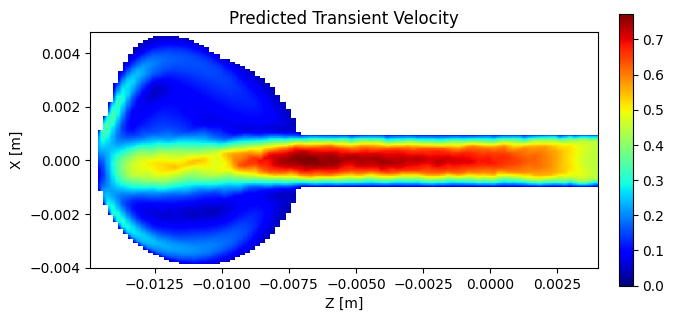

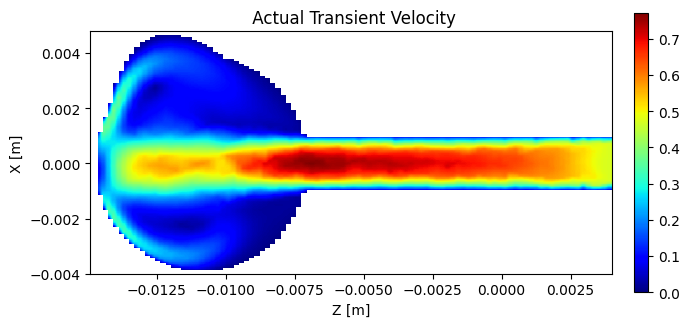

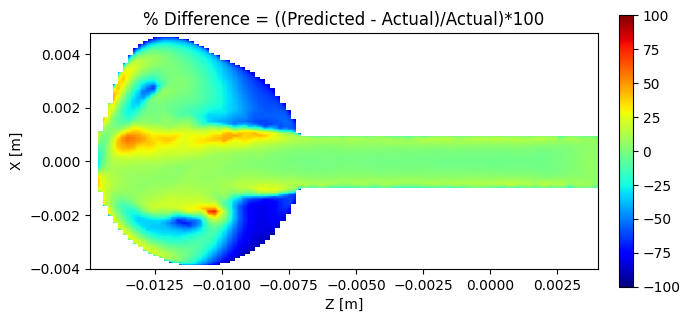

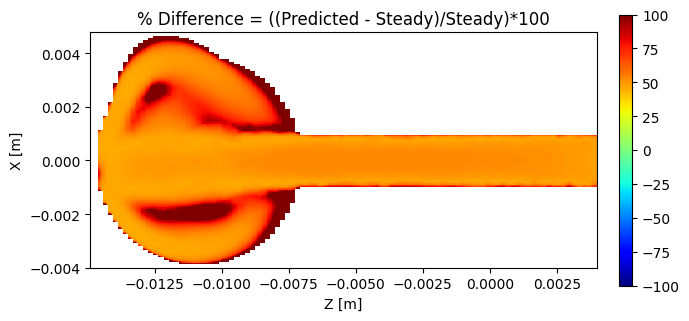

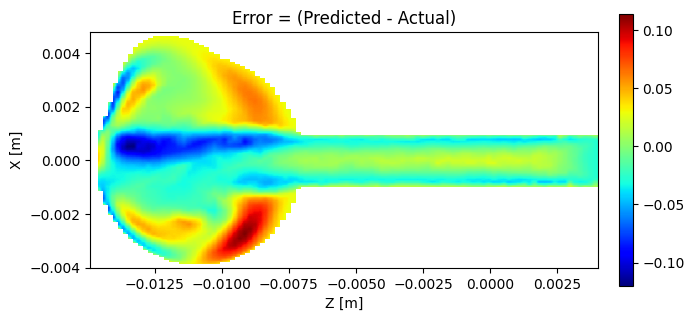

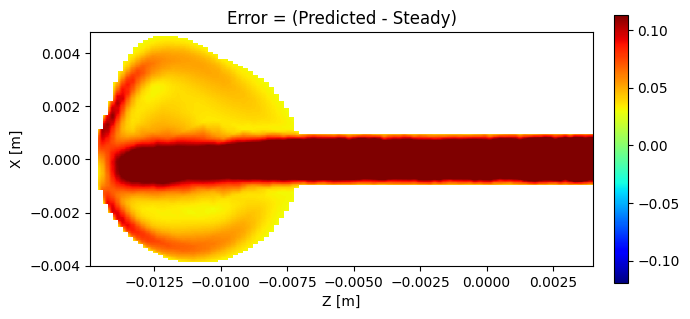

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1,fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2,fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Predicted - Actual)/Actual)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Predicted - Steady)/Steady)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, fraction=0.025, pad=0.04)
ax3.set_title('Error = (Predicted - Actual)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, fraction=0.025, pad=0.04)
ax4.set_title('Error = (Predicted - Steady)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()



In [75]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3/100, 'and' ,average_percentage_change4/100)

max_velocity = np.max(Prediction0)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient0[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient0[' Velocity [ m s^-1 ]'], Prediction0)
print(r2)

0.19008167961398845 and 0.736690526353441
Maximum velocity from the prediction is: 0.7823145985603333
Maximum velocity from the actual is: 0.773
% is: 1.204993345450612
0.9678810011967225


# **RESULTS N41**

In [76]:
PredictedTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41P.csv')
# Print column names
print(PredictedTransient1.columns)
PredictedTransient1 = PredictedTransient1.fillna(0)
PredictedTransient1 = PredictedTransient1.replace(' null', np.nan)
x = PredictedTransient1[' X [ m ]']
z = PredictedTransient1[' Z [ m ]']
ste_velocity1 = PredictedTransient1[' Velocity [ m s^-1 ]']
velocity1 = PredictedTransient1['Transient Prediction 1']
diff_ste1 = PredictedTransient1['Transient Prediction 1'] - PredictedTransient1[' Velocity [ m s^-1 ]']

CFDTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41Tmax\N41TV.csv')
print(CFDTransient1.columns)
CFDTransient1 = CFDTransient1.fillna(0)
CFDTransient1 = CFDTransient1.replace(' null', np.nan)
x = CFDTransient1 [' X [ m ]']
z = CFDTransient1 [' Z [ m ]']
velocity_truth1 = CFDTransient1 [' Velocity [ m s^-1 ]']
diff_vel1 = PredictedTransient1['Transient Prediction 1'] - CFDTransient1[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 1'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


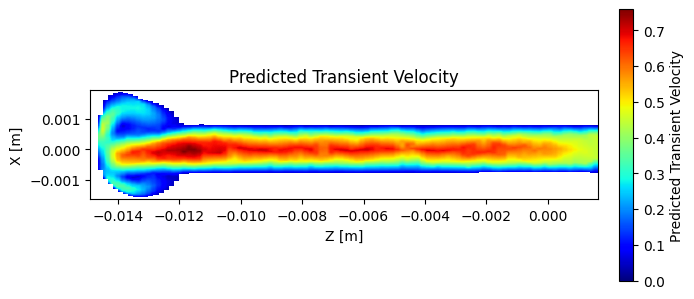

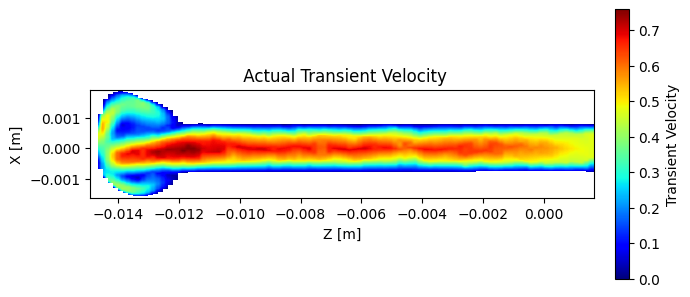

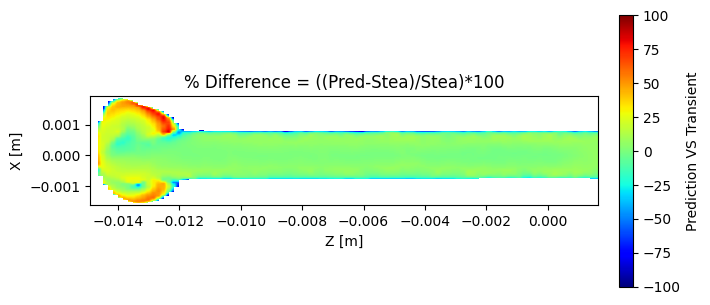

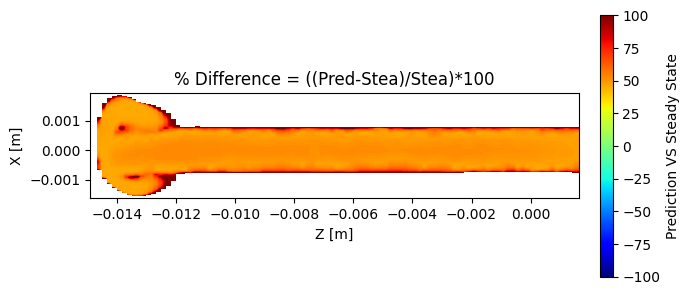

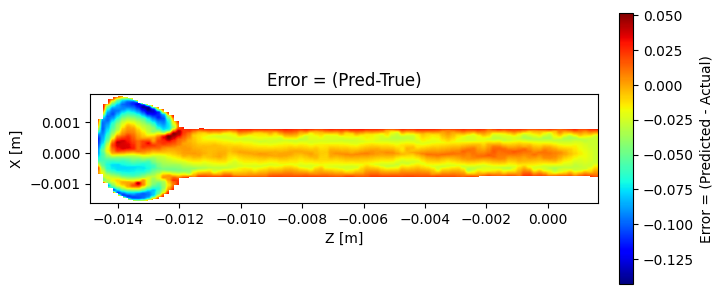

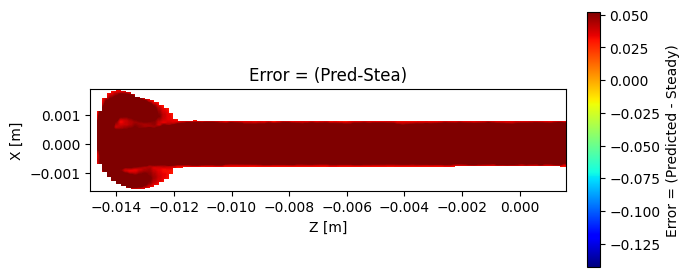

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste1, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [78]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction1)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient1[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient1[' Velocity [ m s^-1 ]'], Prediction1)
print(r2)

10.591408520792482 and 68.94138578147361
Maximum velocity from the prediction is: 0.7595194578170776
Maximum velocity from the actual is: 0.761
% is: 0.1945521922368427
0.9518494203718685


# **RESULTS N42**

In [79]:
PredictedTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42P.csv')
# Print column names
print(PredictedTransient2.columns)
PredictedTransient2 = PredictedTransient2.fillna(0)
PredictedTransient2 = PredictedTransient2.replace(' null', np.nan)
x = PredictedTransient2[' X [ m ]']
z = PredictedTransient2[' Z [ m ]']
ste_velocity2 = PredictedTransient2[' Velocity [ m s^-1 ]']
velocity2 = PredictedTransient2['Transient Prediction 2']
diff_ste2 = PredictedTransient2['Transient Prediction 2'] - PredictedTransient1[' Velocity [ m s^-1 ]']
CFDTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42Tmax\N42TV.csv')
print(CFDTransient2.columns)
CFDTransient2 = CFDTransient2.fillna(0)
CFDTransient2 = CFDTransient2.replace(' null', np.nan)
x = CFDTransient2 [' X [ m ]']
z = CFDTransient2 [' Z [ m ]']
velocity_truth2 = CFDTransient2 [' Velocity [ m s^-1 ]']
diff_vel2 = PredictedTransient2['Transient Prediction 2'] - CFDTransient2[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 2'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


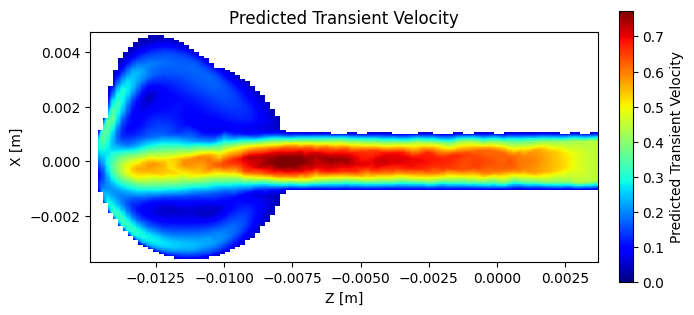

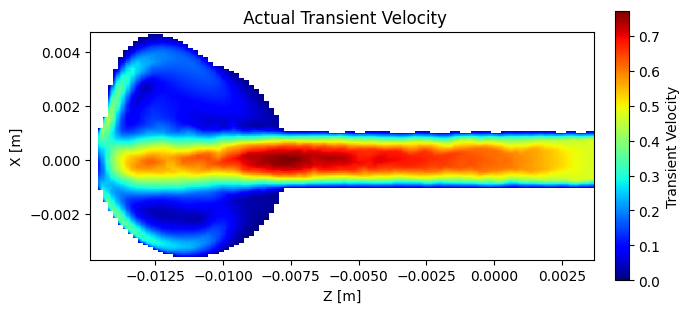

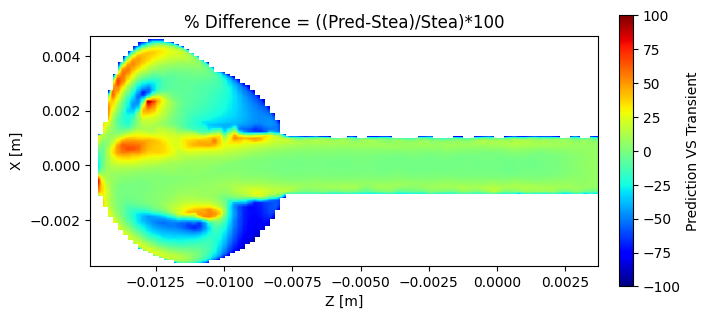

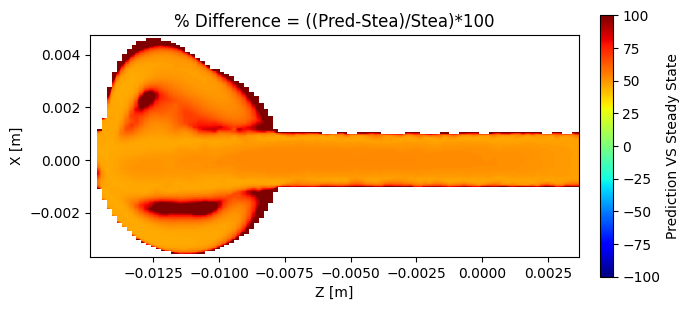

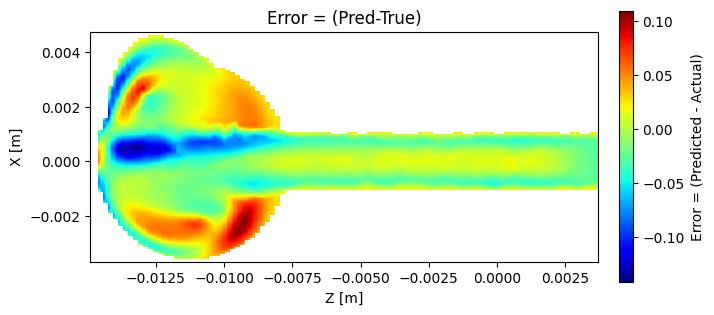

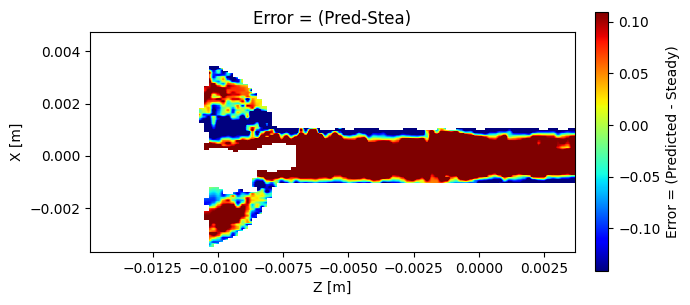

In [80]:

grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste2, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()



In [81]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction2)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient2[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient2[' Velocity [ m s^-1 ]'], Prediction2)
print(r2)

17.351790756935735 and 75.95441201179933
Maximum velocity from the prediction is: 0.7883145809173584
Maximum velocity from the actual is: 0.774
% is: 1.8494290590902296
0.9624034557064021


# **RESULTS N43**

In [82]:
PredictedTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43P.csv')
# Print column names
print(PredictedTransient3.columns)
PredictedTransient3 = PredictedTransient3.fillna(0)
PredictedTransient3 = PredictedTransient3.replace(' null', np.nan)
x = PredictedTransient3[' X [ m ]']
z = PredictedTransient3[' Z [ m ]']
ste_velocity3 = PredictedTransient3[' Velocity [ m s^-1 ]']
velocity3 = PredictedTransient3['Transient Prediction 3']
diff_ste3 = PredictedTransient3['Transient Prediction 3'] - PredictedTransient3[' Velocity [ m s^-1 ]']

CFDTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43Tmax\N43TV.csv')
print(CFDTransient3.columns)
CFDTransient3 = CFDTransient3.fillna(0)
CFDTransient3 = CFDTransient3.replace(' null', np.nan)
x = CFDTransient3 [' X [ m ]']
z = CFDTransient3 [' Z [ m ]']
velocity_truth3 = CFDTransient3 [' Velocity [ m s^-1 ]']
diff_vel3 = PredictedTransient3['Transient Prediction 3'] - CFDTransient3[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 3'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


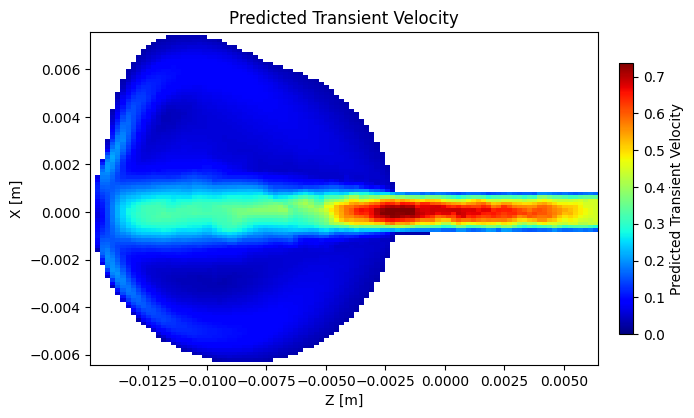

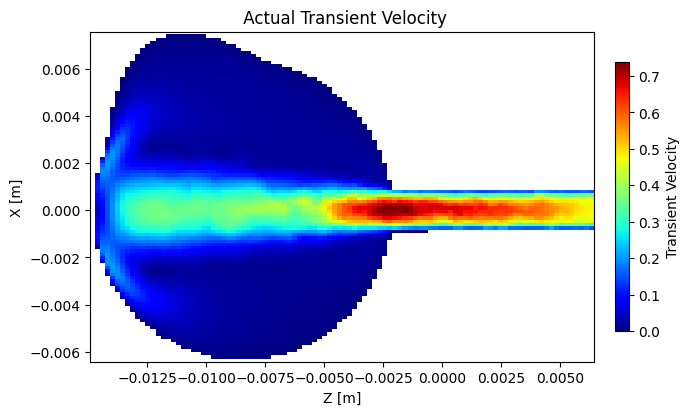

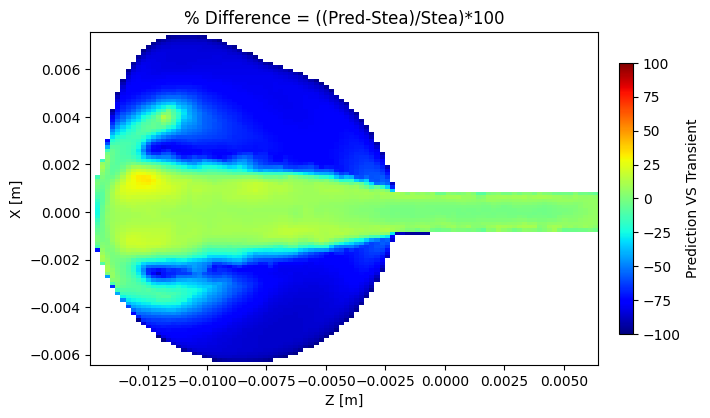

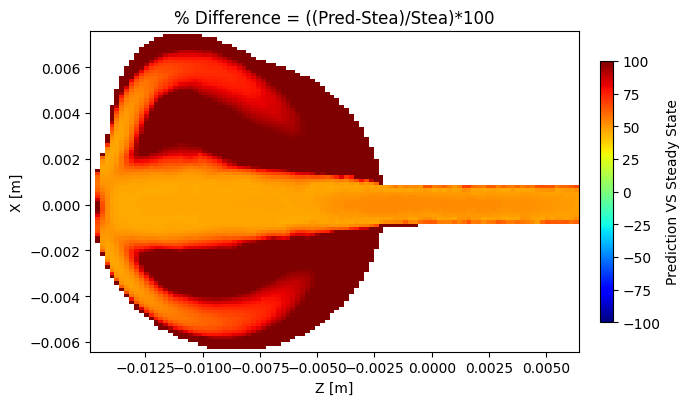

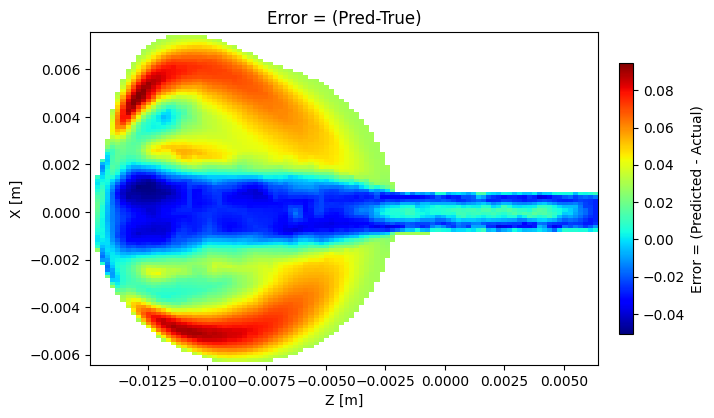

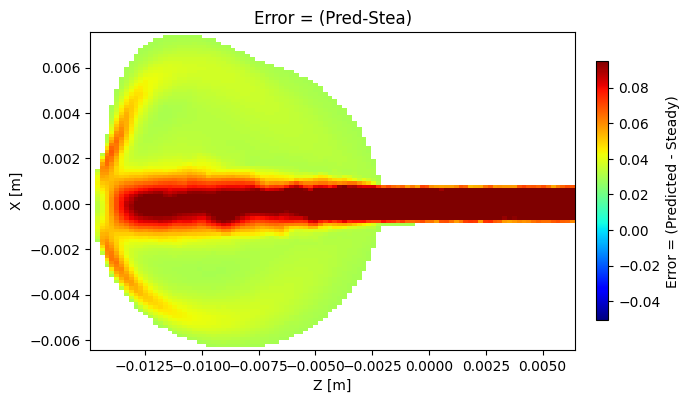

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste3, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [84]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction3)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity3 = CFDTransient3[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient3[' Velocity [ m s^-1 ]'], Prediction3)
print(r2)

44.6067271873759 and 131.38690195480197
Maximum velocity from the prediction is: 0.7533677220344543
Maximum velocity from the actual is: 0.774
% is: 2.665668987796599
0.9309784312720635


# **RESULTS N44**

In [85]:
PredictedTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44P.csv')
# Print column names
print(PredictedTransient4.columns)
PredictedTransient4 = PredictedTransient4.fillna(0)
PredictedTransient4 = PredictedTransient4.replace(' null', np.nan)
x = PredictedTransient4[' X [ m ]']
z = PredictedTransient4[' Z [ m ]']
ste_velocity4 = PredictedTransient4[' Velocity [ m s^-1 ]']
velocity4 = PredictedTransient4['Transient Prediction 4']
diff_ste4 = PredictedTransient4['Transient Prediction 4'] - PredictedTransient4[' Velocity [ m s^-1 ]']

CFDTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44Tmax\N44TV.csv')
print(CFDTransient4.columns)
CFDTransient4 = CFDTransient4.fillna(0)
CFDTransient4 = CFDTransient4.replace(' null', np.nan)
x = CFDTransient4 [' X [ m ]']
z = CFDTransient4 [' Z [ m ]']
velocity_truth4 = CFDTransient4 [' Velocity [ m s^-1 ]']
diff_vel4 = PredictedTransient4['Transient Prediction 4'] - CFDTransient4[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 4'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


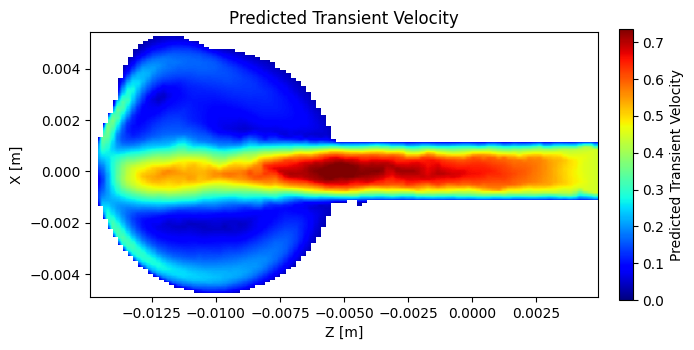

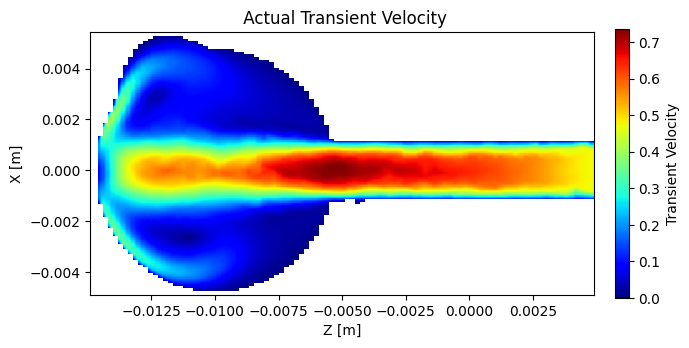

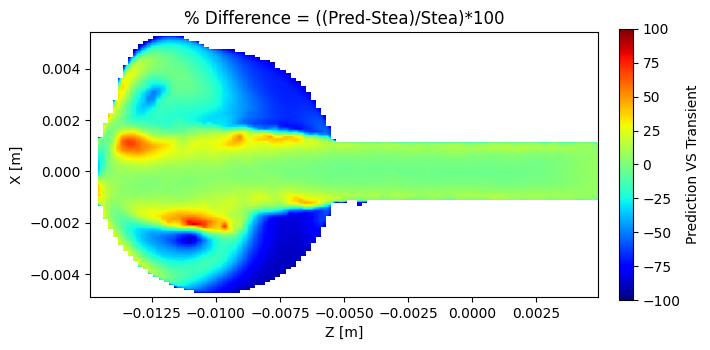

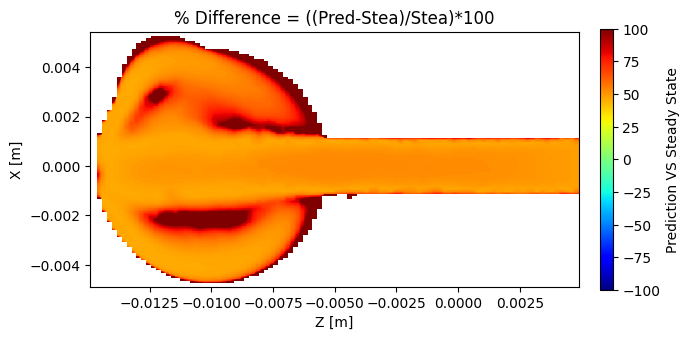

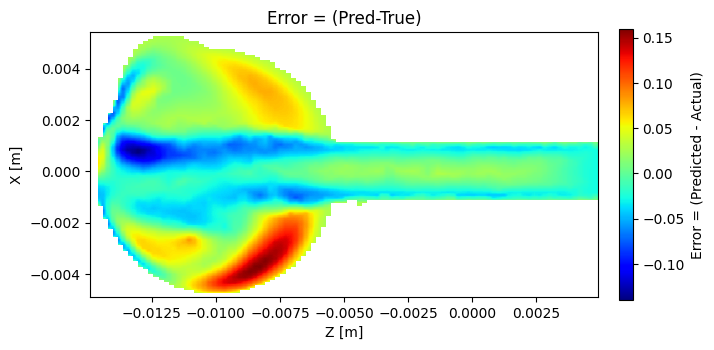

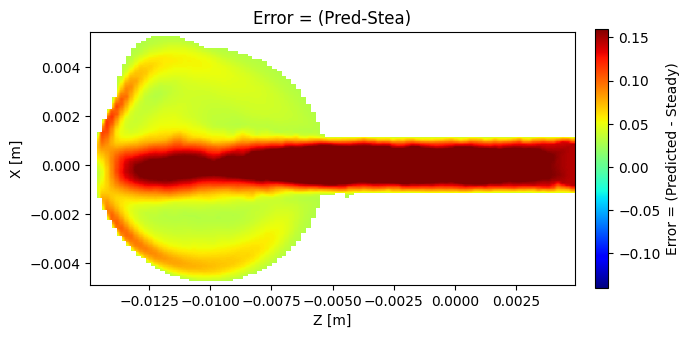

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste4, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [87]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction4)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient4[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient4[' Velocity [ m s^-1 ]'], Prediction4)
print(r2)

25.03632533445748 and 84.44528907412561
Maximum velocity from the prediction is: 0.7579842209815979
Maximum velocity from the actual is: 0.737
% is: 2.84724843712319
0.9348040834902291


# **RESULTS 45**

In [88]:
PredictedTransient5 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N45P.csv')
# Print column names
print(PredictedTransient5.columns)
PredictedTransient5 = PredictedTransient5.fillna(0)
PredictedTransient5 = PredictedTransient5.replace(' null', np.nan)
x = PredictedTransient5[' X [ m ]']
z = PredictedTransient5[' Z [ m ]']
ste_velocity5 = PredictedTransient5[' Velocity [ m s^-1 ]']
velocity5 = PredictedTransient5['Transient Prediction 5']
diff_ste5 = PredictedTransient5['Transient Prediction 5'] - PredictedTransient5[' Velocity [ m s^-1 ]']

CFDTransient5 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N45Tmax\N45TV.csv')
print(CFDTransient5.columns)
CFDTransient5 = CFDTransient5.fillna(0)
CFDTransient5 = CFDTransient5.replace(' null', np.nan)
x = CFDTransient5 [' X [ m ]']
z = CFDTransient5 [' Z [ m ]']
velocity_truth5 = CFDTransient5 [' Velocity [ m s^-1 ]']
diff_vel5 = PredictedTransient5['Transient Prediction 5'] - CFDTransient5[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 5'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


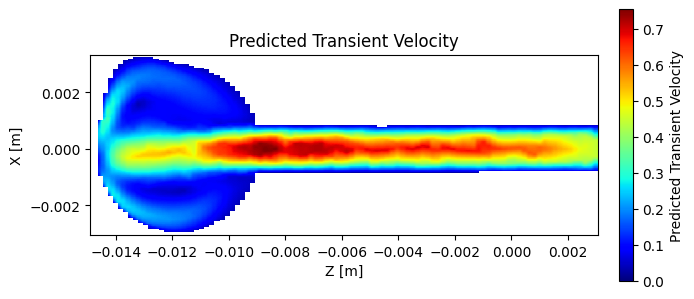

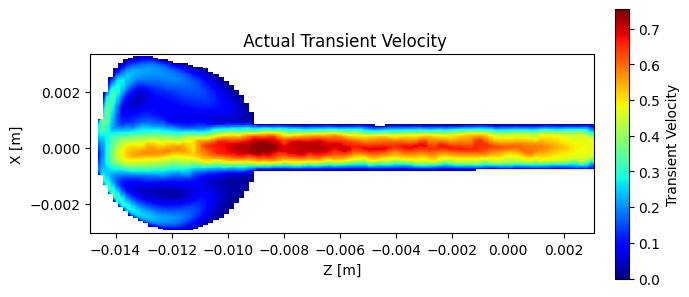

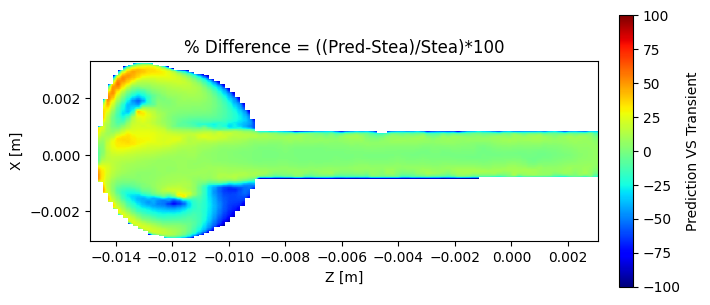

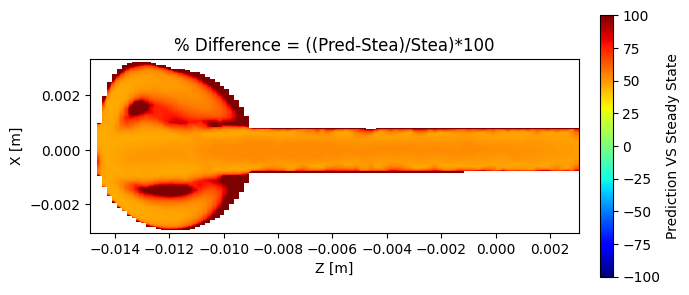

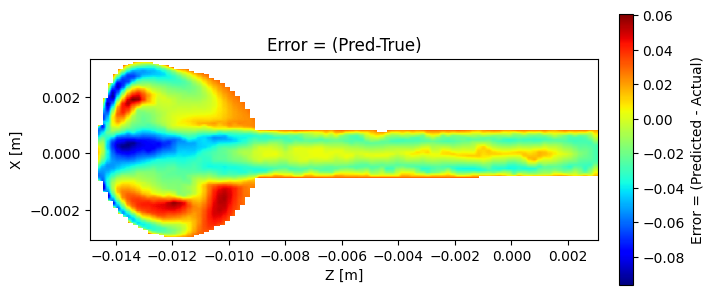

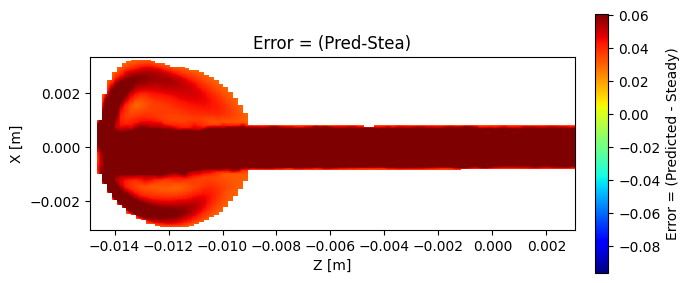

14.60641673876443 and 85.96033214604472
Maximum velocity from the prediction is: 0.7641138434410095
Maximum velocity from the actual is: 0.759
% is: 0.6737606641646263
0.9759361243684453


In [89]:

# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity5, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity5, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth5, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel5, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste5, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values
# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))
print(average_percentage_change3, 'and', average_percentage_change4)
max_velocity = np.max(Prediction5)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient5[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")
relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage
print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient5[' Velocity [ m s^-1 ]'], Prediction5)
print(r2)

# **RESULTS N46**

In [90]:
PredictedTransient6 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N46P.csv')
# Print column names
print(PredictedTransient6.columns)
PredictedTransient6 = PredictedTransient6.fillna(0)
PredictedTransient6 = PredictedTransient6.replace(' null', np.nan)
x = PredictedTransient6[' X [ m ]']
z = PredictedTransient6[' Z [ m ]']
ste_velocity6 = PredictedTransient6[' Velocity [ m s^-1 ]']
velocity6 = PredictedTransient6['Transient Prediction 6']
diff_ste6 = PredictedTransient6['Transient Prediction 6'] - PredictedTransient6[' Velocity [ m s^-1 ]']

CFDTransient6 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N46Tmax\N46TV.csv')
print(CFDTransient6.columns)
CFDTransient6 = CFDTransient6.fillna(0)
CFDTransient6 = CFDTransient6.replace(' null', np.nan)
x = CFDTransient6 [' X [ m ]']
z = CFDTransient6 [' Z [ m ]']
velocity_truth6 = CFDTransient6 [' Velocity [ m s^-1 ]']
diff_vel6 = PredictedTransient6 ['Transient Prediction 6'] - CFDTransient6[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 6'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


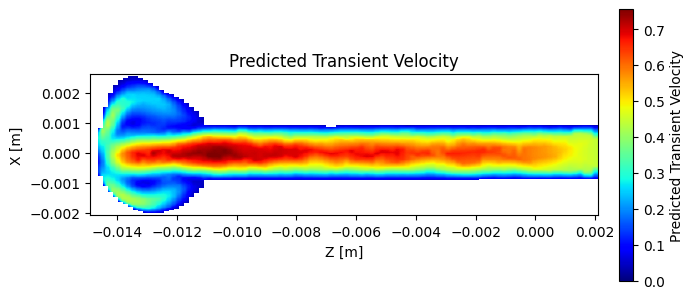

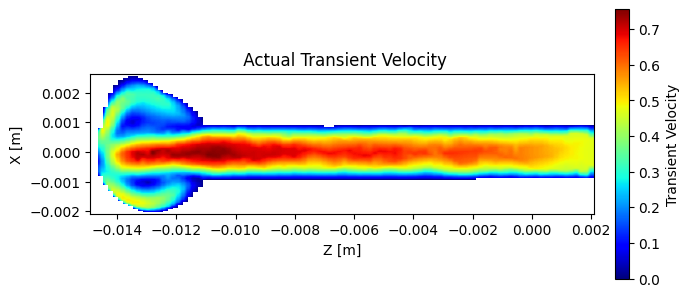

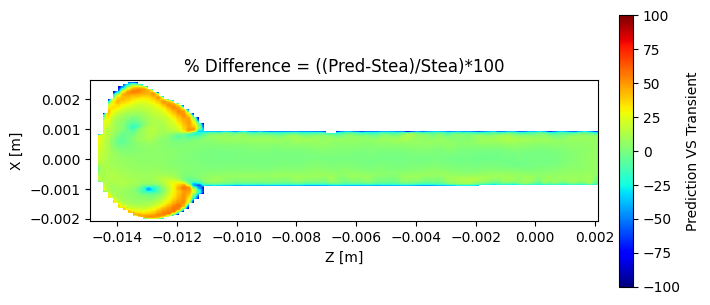

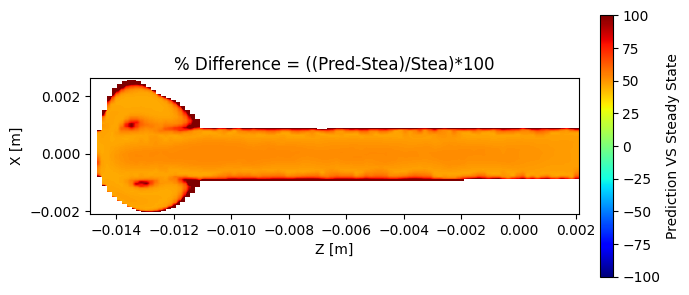

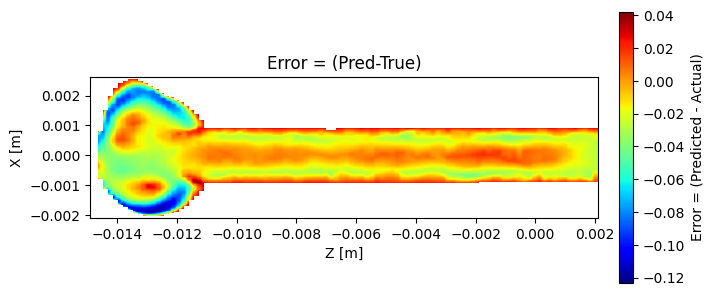

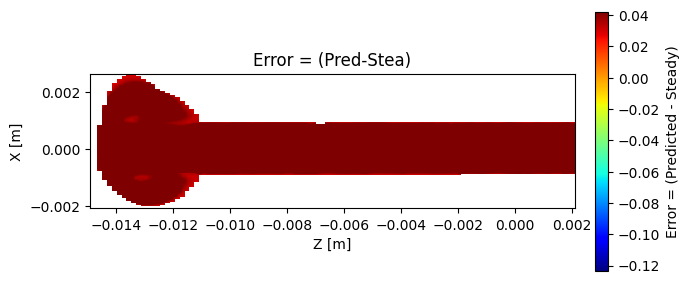

10.440969849026596 and 78.92177858957226
Maximum velocity from the prediction is: 0.7641138434410095
Maximum velocity from the actual is: 0.761
% is: 0.409177850329765
0.9627434293642165


In [91]:

# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity6, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity6, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth6, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel6, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste6, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))
print(average_percentage_change3, 'and', average_percentage_change4)
max_velocity = np.max(Prediction6)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient6[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")
relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage
print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient6[' Velocity [ m s^-1 ]'], Prediction6)
print(r2)

# **RESULTS N47**

In [92]:
PredictedTransient7 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N47P.csv')
# Print column names
print(PredictedTransient7.columns)
PredictedTransient7 = PredictedTransient7.fillna(0)
PredictedTransient7 = PredictedTransient7.replace(' null', np.nan)
x = PredictedTransient7[' X [ m ]']
z = PredictedTransient7[' Z [ m ]']
ste_velocity7 = PredictedTransient7[' Velocity [ m s^-1 ]']
velocity7 = PredictedTransient7['Transient Prediction 7']
diff_ste7 = PredictedTransient7['Transient Prediction 7'] - PredictedTransient7[' Velocity [ m s^-1 ]']

CFDTransient7 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N47Tmax\N47TV.csv')
print(CFDTransient7.columns)
CFDTransient7 = CFDTransient7.fillna(0)
CFDTransient7 = CFDTransient7.replace(' null', np.nan)
x = CFDTransient7 [' X [ m ]']
z = CFDTransient7 [' Z [ m ]']
velocity_truth7 = CFDTransient7 [' Velocity [ m s^-1 ]']
diff_vel7 = PredictedTransient7 ['Transient Prediction 7'] - CFDTransient7[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 7'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


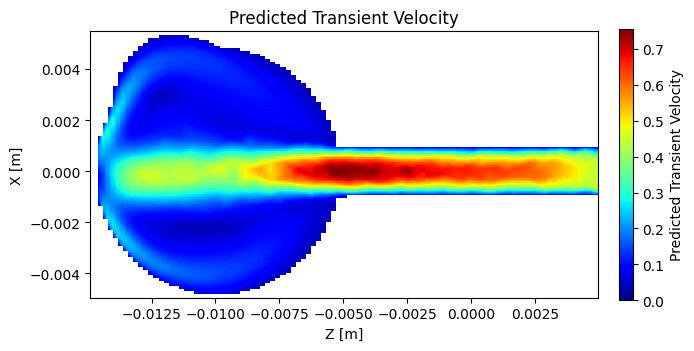

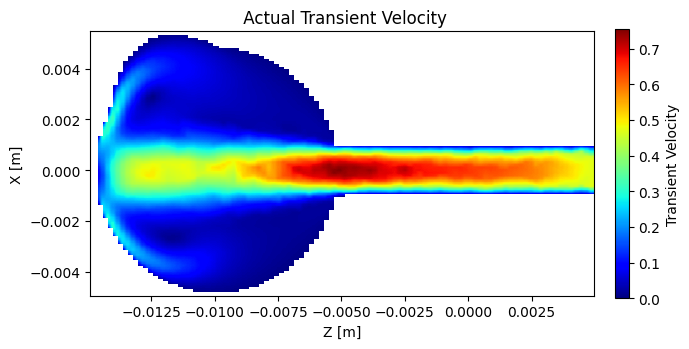

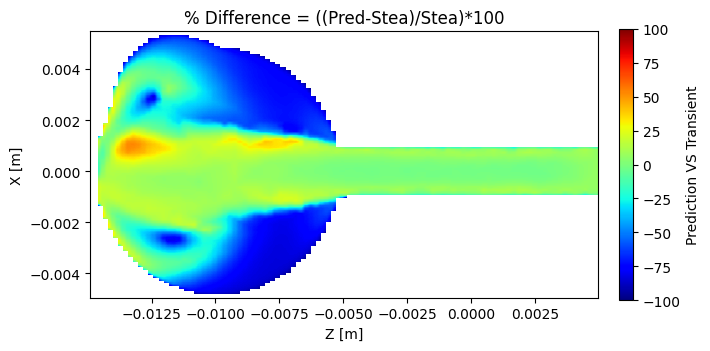

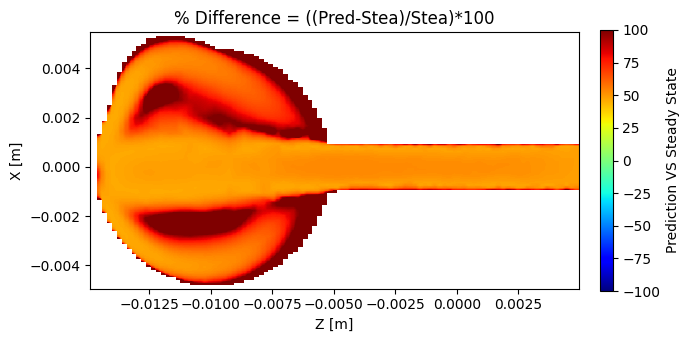

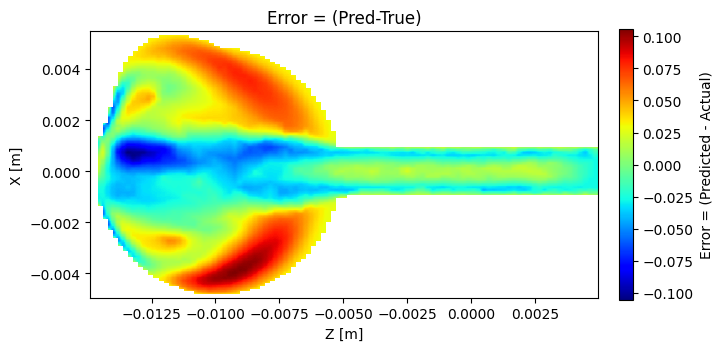

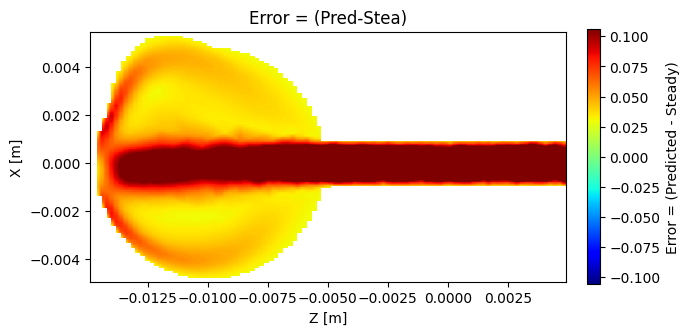

29.130602372735225 and 86.96566418467323
Maximum velocity from the prediction is: 0.7717329263687134
Maximum velocity from the actual is: 0.757
% is: 1.9462254119832725
0.9477177446256777


In [93]:

# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity7, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity7, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth7, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel7, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste7, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values
# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))
print(average_percentage_change3, 'and', average_percentage_change4)
max_velocity = np.max(Prediction7)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient7[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")
relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage
print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient7[' Velocity [ m s^-1 ]'], Prediction7)
print(r2)

# **RESULTS N48**

In [94]:
PredictedTransient8 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N48P.csv')
# Print column names
print(PredictedTransient8.columns)
PredictedTransient8 = PredictedTransient8.fillna(0)
PredictedTransient8 = PredictedTransient8.replace(' null', np.nan)
x = PredictedTransient8[' X [ m ]']
z = PredictedTransient8[' Z [ m ]']
ste_velocity8 = PredictedTransient8[' Velocity [ m s^-1 ]']
velocity8 = PredictedTransient8['Transient Prediction 8']
diff_ste8 = PredictedTransient8['Transient Prediction 8'] - PredictedTransient8[' Velocity [ m s^-1 ]']

CFDTransient8 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N48Tmax\N48TV.csv')
print(CFDTransient8.columns)
CFDTransient8 = CFDTransient8.fillna(0)
CFDTransient8 = CFDTransient8.replace(' null', np.nan)
x = CFDTransient8 [' X [ m ]']
z = CFDTransient8 [' Z [ m ]']
velocity_truth8 = CFDTransient8 [' Velocity [ m s^-1 ]']
diff_vel8 = PredictedTransient8 ['Transient Prediction 8'] - CFDTransient8[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 8'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


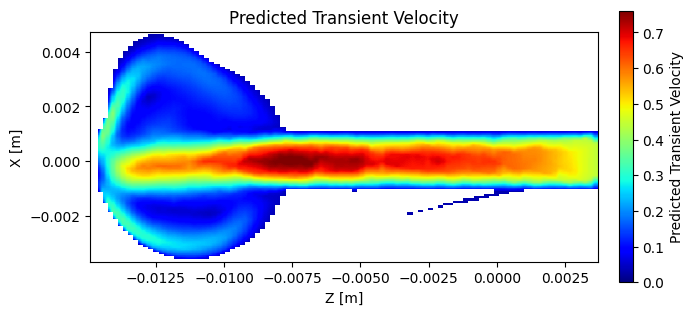

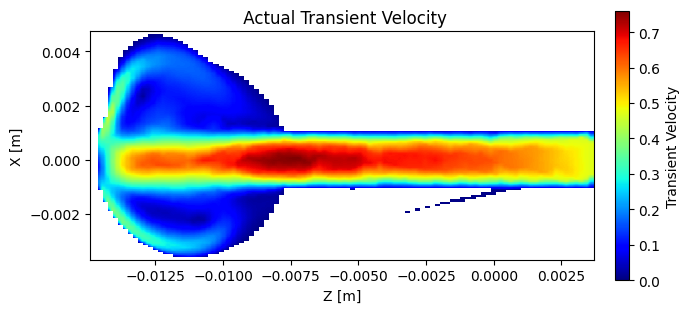

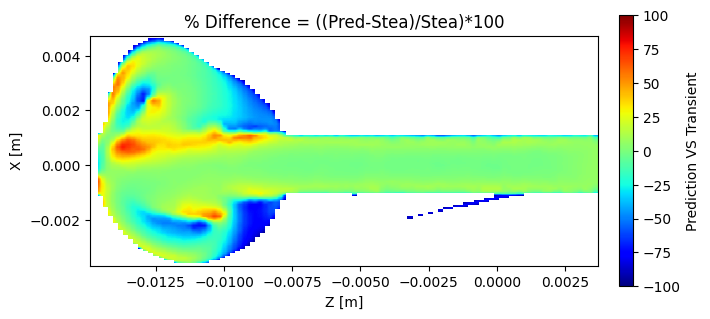

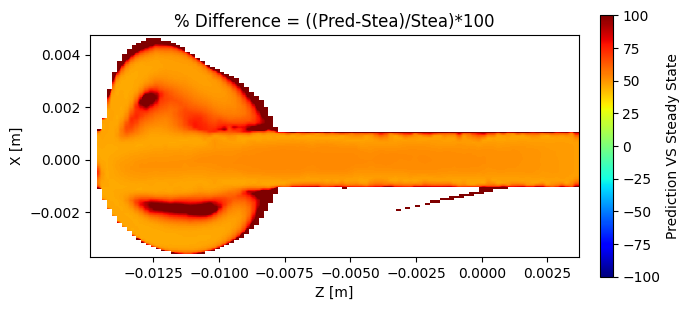

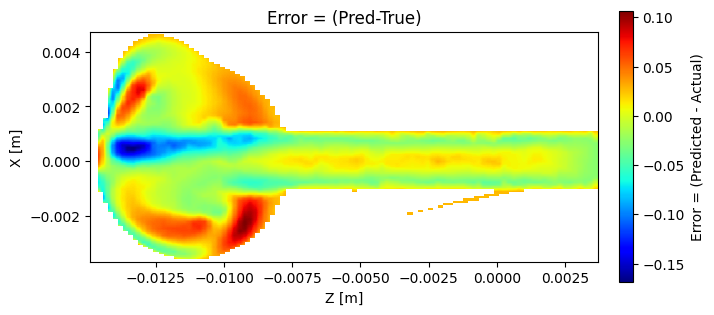

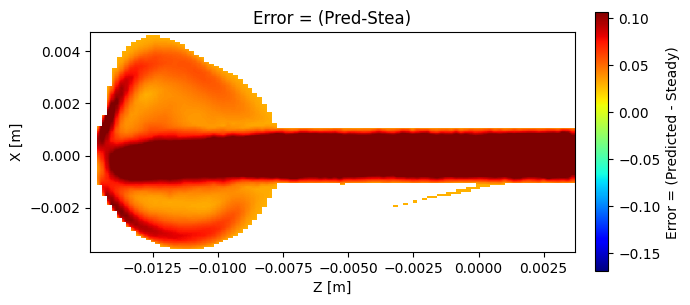

17.65213640009645 and 94.55483931873599
Maximum velocity from the prediction is: 0.7793017625808716
Maximum velocity from the actual is: 0.763
% is: 2.1365350695768766
0.9632803579924594


In [95]:

# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity8, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity8, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth8, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel8, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste8, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values
# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))
print(average_percentage_change3, 'and', average_percentage_change4)
max_velocity = np.max(Prediction8)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient8[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")
relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage
print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient8[' Velocity [ m s^-1 ]'], Prediction8)
print(r2)

# **RESULTS N49**

In [96]:
PredictedTransient9 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N49P.csv')
# Print column names
print(PredictedTransient9.columns)
PredictedTransient9 = PredictedTransient9.fillna(0)
PredictedTransient9 = PredictedTransient9.replace(' null', np.nan)
x = PredictedTransient9[' X [ m ]']
z = PredictedTransient9[' Z [ m ]']
ste_velocity9 = PredictedTransient9[' Velocity [ m s^-1 ]']
velocity9 = PredictedTransient9['Transient Prediction 9']
diff_ste9 = PredictedTransient9['Transient Prediction 9'] - PredictedTransient9[' Velocity [ m s^-1 ]']

CFDTransient9 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N49Tmax\N49TV.csv')
print(CFDTransient9.columns)
CFDTransient9 = CFDTransient9.fillna(0)
CFDTransient9 = CFDTransient9.replace(' null', np.nan)
x = CFDTransient9 [' X [ m ]']
z = CFDTransient9 [' Z [ m ]']
velocity_truth9 = CFDTransient9 [' Velocity [ m s^-1 ]']
diff_vel9 = PredictedTransient9 ['Transient Prediction 9'] - CFDTransient9[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 9'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


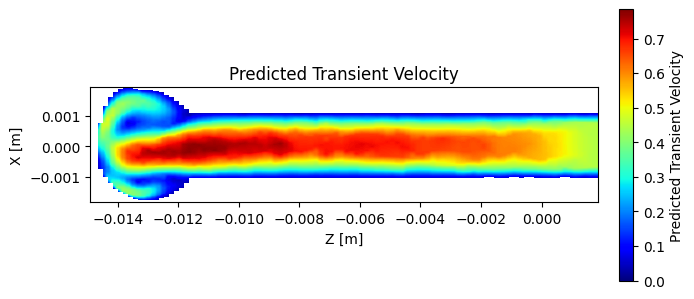

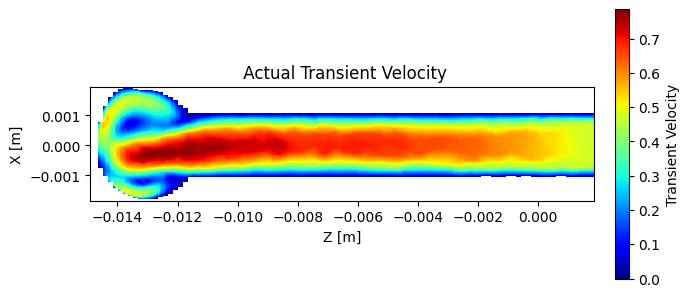

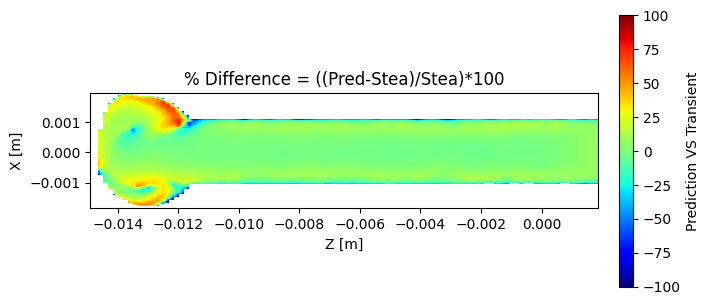

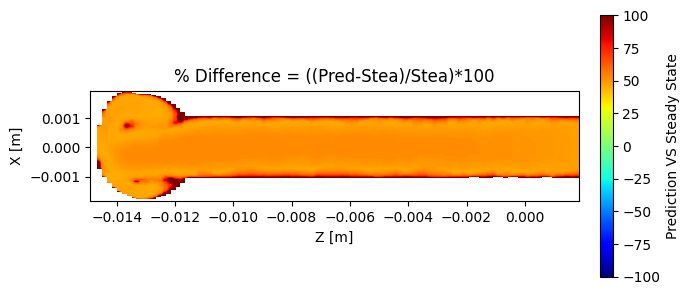

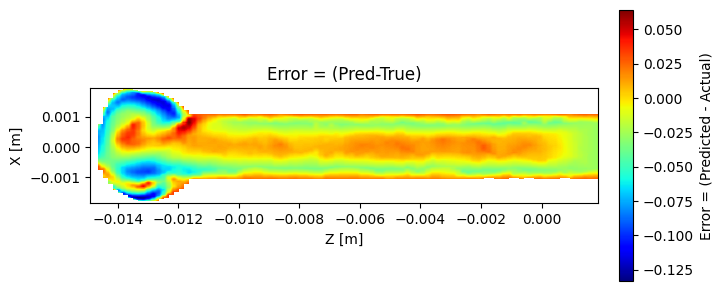

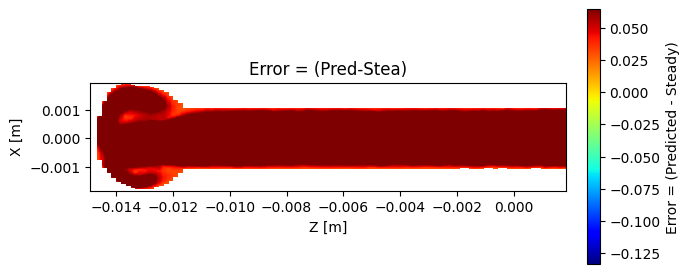

8.992539766532959 and 62.43427644357566
Maximum velocity from the prediction is: 0.7777920961380005
Maximum velocity from the actual is: 0.789
% is: 1.4205201346007028
0.9651892739537107


In [97]:

# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity9, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity9, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth9, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel9, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste9, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))
rotated_masked_velocity3 = np.transpose(np.rot90(masked_velocity3, 1))
rotated_masked_velocity4 = np.transpose(np.rot90(masked_velocity4, 1))

# Generate heat maps for velocity
fig, (ax1) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

# Generate heat maps for velocity
fig, (ax2) = plt.subplots(1, figsize=(7, 7))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title(' Actual Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100



fig, (ax3) = plt.subplots(1, figsize=(7, 7))
im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='Prediction VS Transient', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")


fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='Prediction VS Steady State', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


# Plotting
fig, (ax3) = plt.subplots(1, figsize=(7, 7))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(rotated_masked_velocity3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Predicted - Actual)', fraction=0.025, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

fig, (ax4) = plt.subplots(1, figsize=(7, 7))
im4 = ax4.imshow(rotated_masked_velocity4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=rotated_masked_velocity3.min(), vmax=rotated_masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Predicted - Steady)', fraction=0.025, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))
print(average_percentage_change3, 'and', average_percentage_change4)
max_velocity = np.max(Prediction9)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient9[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")
relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage
print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient9[' Velocity [ m s^-1 ]'], Prediction9)
print(r2)